In [1]:
#Задание 1.1
#Даны файлы orders.csv и products.csv. 
#Определите число уникальных продуктов в каждой категории.
#Выведите все продукты в категории "Морепродукты".
#Выведите график числа заказов за каждый прошедший месяц.
#Заведите столбец "OrderSum" (сколько было оплачено за продукт по заказу, с учётом его количества, стоимости единицы товара и скидки). Определите самые дорогие заказы (сгруппировав по OrderID)
#Определите продукты с максимальной стоимостью за шт. (не за единицу товара)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
orders_df = pd.read_csv('CSV_files/orders.csv')
products_df = pd.read_csv('CSV_files/products.csv')

In [4]:
orders_df

,OrderID,OrderDate,ProductID,UnitPrice,Quantity,Discount
0,10248,2007-01-30,11,28.62,12,0.00
1,10248,2007-01-30,42,14.04,10,0.00
2,10248,2007-01-30,72,12.71,5,0.00
3,10249,2006-01-29,14,22.80,9,0.00
4,10249,2006-01-29,51,101.20,40,0.00
...,...,...,...,...,...,...
2167,11083,2006-06-16,37,4.50,7,0.00
2168,11083,2006-06-16,42,15.65,10,0.00
2169,11083,2006-06-16,47,25.50,5,0.00
2170,11083,2006-06-16,51,99.90,3,0.03


In [5]:
products_df

,ProductID,ProductName,QuantityPerUnit,UnitCost,UnitPrice,CategoryName
0,1,Банан,10,15.37,20.00,Фрукты
1,2,Апельсин,10,16.17,19.00,Фрукты
2,5,Яблоко,100,4.72,6.00,Фрукты
3,11,Киви,25,21.10,28.00,Фрукты
4,24,Абрикос,100,3.90,4.50,Фрукты
...,...,...,...,...,...,...
72,42,Утка,1,10.95,14.00,Мясо/Птица
73,52,Говядина,14,70.81,80.00,Мясо/Птица
74,56,Свинина,15,34.17,38.00,Мясо/Птица
75,57,Фарш свиной,20,16.14,19.50,Мясо/Птица


In [6]:
#Дата-фрейм, объединяющий оба существующих по ProductID
#df_products_and_orders = pd.merge(orders_df, products_df, how = 'inner', on = 'ProductID')

In [7]:
#Определить число уникальных продуктов в каждой категории
products_df['CategoryName'].unique()

array(['Фрукты', 'Овощи', 'Крупы', 'Морепродукты', 'Приправы',
       'Молочные продукты', 'Кондитерские изделия', 'Мясо/Птица'],
      dtype=object)

In [8]:
#Всего уникальных продуктов
products_df['ProductName'].nunique()

77

In [9]:
#Количество уникальных продуктов по всем категориям
products_df.groupby('CategoryName')['ProductName'].count()

CategoryName
Кондитерские изделия    17
Крупы                    4
Молочные продукты        6
Морепродукты             7
Мясо/Птица               7
Овощи                   16
Приправы                11
Фрукты                   9
Name: ProductName, dtype: int64

In [10]:
#Вывести все продукты в категории "Морепродукты"
products_df.loc[products_df['CategoryName'] == 'Морепродукты']['ProductName'].unique()

array(['Омары', 'Кальмары', 'Креветки', 'Крабовые палочки', 'Мидии мини',
       'Креветки мини', 'Мидии'], dtype=object)

In [11]:
#Вывести график числа заказов за каждый прошедший месяц

#Преобразование столбца с датой заказа в дату
orders_df['OrderDate'] = pd.to_datetime(orders_df['OrderDate'])

#Новый столбец для обозначения номера месяца заказа
orders_df['YearMonth'] = orders_df['OrderDate'].dt.to_period('M')
orders_df

,OrderID,OrderDate,ProductID,UnitPrice,Quantity,Discount,YearMonth
0,10248,2007-01-30,11,28.62,12,0.00,2007-01
1,10248,2007-01-30,42,14.04,10,0.00,2007-01
2,10248,2007-01-30,72,12.71,5,0.00,2007-01
3,10249,2006-01-29,14,22.80,9,0.00,2006-01
4,10249,2006-01-29,51,101.20,40,0.00,2006-01
...,...,...,...,...,...,...,...
2167,11083,2006-06-16,37,4.50,7,0.00,2006-06
2168,11083,2006-06-16,42,15.65,10,0.00,2006-06
2169,11083,2006-06-16,47,25.50,5,0.00,2006-06
2170,11083,2006-06-16,51,99.90,3,0.03,2006-06


In [12]:
#Зависимость количества заказов от месяца
dependence = orders_df.groupby('YearMonth')['Quantity'].count()
dependence

YearMonth
2003-11      5
2003-12      3
2004-01     10
2004-02      5
2004-03      7
2004-04      6
2004-05      9
2004-06     23
2004-07     32
2004-08     23
2004-09     11
2004-10     59
2004-11     59
2004-12     52
2005-01     24
2005-02     25
2005-03     18
2005-04     15
2005-05     21
2005-06     24
2005-07     45
2005-08     33
2005-09     10
2005-10     24
2005-11     73
2005-12     68
2006-01    114
2006-02     55
2006-03     75
2006-04     52
2006-05    100
2006-06     79
2006-07     85
2006-08     84
2006-09     56
2006-10     86
2006-11    159
2006-12    118
2007-01     75
2007-02     79
2007-03     79
2007-04     36
2007-05     30
2007-06     18
2007-07    108
Freq: M, Name: Quantity, dtype: int64

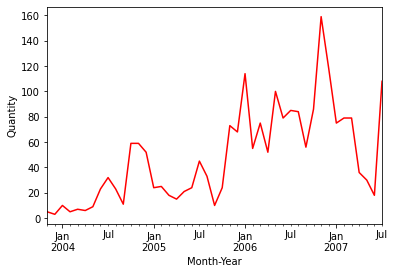

In [13]:
figure, ax = plt.subplots()

dependence.plot(color = 'red') 

ax.set_xlabel('Month-Year')
ax.set_ylabel('Quantity')

plt.show()

In [14]:
#Удаление добавленного ранее столбца
orders_df = orders_df.drop('YearMonth', axis = 1)

In [15]:
#Завести столбец "OrderSum" (сколько было оплачено за продукт по заказу, с учётом его количества, стоимости единицы товара и скидки). 

orders_df['OrderSum'] =  round(orders_df['UnitPrice'] * orders_df['Quantity'] * (1 - orders_df['Discount']), 2)

In [16]:
orders_df

,OrderID,OrderDate,ProductID,UnitPrice,Quantity,Discount,OrderSum
0,10248,2007-01-30,11,28.62,12,0.00,343.44
1,10248,2007-01-30,42,14.04,10,0.00,140.40
2,10248,2007-01-30,72,12.71,5,0.00,63.55
3,10249,2006-01-29,14,22.80,9,0.00,205.20
4,10249,2006-01-29,51,101.20,40,0.00,4048.00
...,...,...,...,...,...,...,...
2167,11083,2006-06-16,37,4.50,7,0.00,31.50
2168,11083,2006-06-16,42,15.65,10,0.00,156.50
2169,11083,2006-06-16,47,25.50,5,0.00,127.50
2170,11083,2006-06-16,51,99.90,3,0.03,290.71


In [17]:
#Определить самые дорогие заказы (сгруппировав по OrderID)

#Общая сумма заказов
total_orderSum = orders_df.groupby('OrderID')['OrderSum'].sum()

#Сортировка заказов от самых дорогих к самым дешевым
most_expensive_orders = total_orderSum.sort_values(ascending = [False])

In [18]:
#Топ-10 самых дорогих заказов
most_expensive_orders.head(10)

OrderID
10612    33479.95
10991    30370.72
10961    23757.37
10962    21397.63
10530    21352.45
11050    17271.45
10808    16239.76
10475    15969.92
10399    15159.19
10273    14817.57
Name: OrderSum, dtype: float64

In [19]:
#Все заказы от наибольшего к наименьшему
most_expensive_orders

OrderID
10612    33479.95
10991    30370.72
10961    23757.37
10962    21397.63
10530    21352.45
           ...   
10807       20.11
10531       15.80
10881       11.90
10782        8.19
10963        8.13
Name: OrderSum, Length: 836, dtype: float64

In [20]:
#Определить продукты с максимальной стоимостью за шт. (не за единицу товара)

#Новый столбец, отображающий цену за шт. товара (не за единицу)
products_df['PieceCost'] = products_df['UnitCost'] * products_df['QuantityPerUnit']
products_df

,ProductID,ProductName,QuantityPerUnit,UnitCost,UnitPrice,CategoryName,PieceCost
0,1,Банан,10,15.37,20.00,Фрукты,153.70
1,2,Апельсин,10,16.17,19.00,Фрукты,161.70
2,5,Яблоко,100,4.72,6.00,Фрукты,472.00
3,11,Киви,25,21.10,28.00,Фрукты,527.50
4,24,Абрикос,100,3.90,4.50,Фрукты,390.00
...,...,...,...,...,...,...,...
72,42,Утка,1,10.95,14.00,Мясо/Птица,10.95
73,52,Говядина,14,70.81,80.00,Мясо/Птица,991.34
74,56,Свинина,15,34.17,38.00,Мясо/Птица,512.55
75,57,Фарш свиной,20,16.14,19.50,Мясо/Птица,322.80


In [21]:
#Продукты с максимальной стоимость за штуку
max_cost = products_df.sort_index().sort_values('PieceCost', ascending = [False])
max_cost

,ProductID,ProductName,QuantityPerUnit,UnitCost,UnitPrice,CategoryName,PieceCost
25,7,Гречневая крупа,40,33.11,40.00,Крупы,1324.40
21,67,Помидор черри,26,46.10,60.00,Овощи,1198.60
18,63,Кабачок,68,15.90,19.90,Овощи,1081.20
73,52,Говядина,14,70.81,80.00,Мясо/Птица,991.34
32,45,Крабовые палочки,100,8.44,9.50,Морепродукты,844.00
...,...,...,...,...,...,...,...
68,68,Сладкий батончик,1,9.67,12.50,Кондитерские изделия,9.67
56,21,Пирожное Наполеон,1,8.78,10.00,Кондитерские изделия,8.78
54,19,Печенье сахарное,1,7.40,9.20,Кондитерские изделия,7.40
43,41,Зира,1,7.28,9.65,Приправы,7.28


In [22]:
#Топ-10 продуктов с максимальной стоимостью за штуку
max_cost.head(10)

,ProductID,ProductName,QuantityPerUnit,UnitCost,UnitPrice,CategoryName,PieceCost
25,7,Гречневая крупа,40,33.11,40.00,Крупы,1324.40
21,67,Помидор черри,26,46.10,60.00,Овощи,1198.60
18,63,Кабачок,68,15.90,19.90,Овощи,1081.20
73,52,Говядина,14,70.81,80.00,Мясо/Птица,991.34
32,45,Крабовые палочки,100,8.44,9.50,Морепродукты,844.00
35,51,Мидии,10,82.74,99.90,Морепродукты,827.40
67,62,Шоколад Молочное Чудо,30,25.39,29.30,Кондитерские изделия,761.70
45,58,Бадьян,20,37.17,48.25,Приправы,743.40
71,23,Индейка,100,7.43,9.00,Мясо/Птица,743.00
28,74,Овсянная крупа,30,24.39,30.00,Крупы,731.70


In [23]:
#Удаление добавленного ранее столбца
products_df = products_df.drop('PieceCost', axis = 1)